In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.examples.tutorials.mnist import input_data
import math
import tensorflow as tf
import sys
sys.path.insert(0, "/Users/yhhan/git/aiclass/0.Professor/")
import datasource.mnist as mnist
%matplotlib inline

In [2]:
#data = mnist.MNIST_Data()
data = mnist.Fashion_MNIST_Data()

In [3]:
batch_size = 1000
training_epochs = 50
learning_rate = 0.01

epoch_list = []
train_error_list = []
validation_error_list = []
test_accuracy_list = []
diff_index_list = []

# Network Parameters
n_input = 784 # MNIST data input (img shape: 28*28)
n_hidden_1 = 128 # 1st layer number of features
n_hidden_2 = 128 # 2nd layer number of features
n_classes = 10 # MNIST total classes (0-9 digits)

In [4]:
def draw_error_values_and_accuracy():
    # Draw Error Values and Accuracy
    fig = plt.figure(figsize=(20, 5))
    plt.subplot(121)
    plt.plot(epoch_list[1:], train_error_list[1:], 'r', label='Train')
    plt.plot(epoch_list[1:], validation_error_list[1:], 'g', label='Validation')
    plt.ylabel('Total Error')
    plt.xlabel('Epochs')
    plt.grid(True)
    plt.legend(loc='upper right')

    plt.subplot(122)
    plt.plot(epoch_list[1:], test_accuracy_list[1:], 'b', label='Test')
    plt.ylabel('Accuracy')
    plt.xlabel('Epochs')
    plt.yticks(np.arange(0.0, 1.0, 0.05))
    plt.grid(True)
    plt.legend(loc='lower right')
    plt.show()
    
def draw_false_prediction():
    fig = plt.figure(figsize=(20, 5))
    for i in range(5):
        j = diff_index_list[i]
        print("False Prediction Index: %s, Prediction: %s, Ground Truth: %s" % (j, data.labels[prediction[j]], data.labels[ground_truth[j]]))
        img = np.array(data.test_input[j])
        img.shape = (28, 28)
        plt.subplot(150 + (i+1))
        plt.imshow(img, cmap='gray')

Total batch: 55
Epoch:  0, Train Error: 2.29438, Validation Error: 2.29437, Test Accuracy: 0.16950
Epoch:  1, Train Error: 0.85221, Validation Error: 0.84755, Test Accuracy: 0.63650
Epoch:  2, Train Error: 0.62111, Validation Error: 0.61358, Test Accuracy: 0.74860
Epoch:  3, Train Error: 0.57995, Validation Error: 0.57354, Test Accuracy: 0.76860
Epoch:  4, Train Error: 0.50450, Validation Error: 0.50174, Test Accuracy: 0.80060
Epoch:  5, Train Error: 0.44919, Validation Error: 0.44993, Test Accuracy: 0.82500
Epoch:  6, Train Error: 0.43649, Validation Error: 0.43713, Test Accuracy: 0.82840
Epoch:  7, Train Error: 0.45256, Validation Error: 0.45940, Test Accuracy: 0.82630
Epoch:  8, Train Error: 0.41271, Validation Error: 0.42126, Test Accuracy: 0.83520
Epoch:  9, Train Error: 0.38101, Validation Error: 0.39037, Test Accuracy: 0.84850
Epoch: 10, Train Error: 0.36623, Validation Error: 0.37613, Test Accuracy: 0.85190
Epoch: 11, Train Error: 0.35877, Validation Error: 0.37106, Test Accura

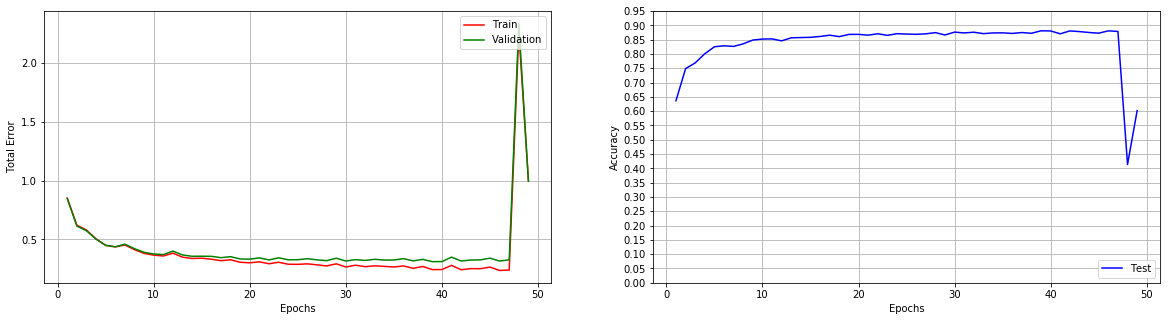

[9 2 1 ..., 8 1 5]
[9 2 1 ..., 8 1 5]
Number of False Prediction: 2113
False Prediction Index: 4, Prediction: pullover, Ground Truth: shirt
False Prediction Index: 12, Prediction: sandal, Ground Truth: sneaker
False Prediction Index: 17, Prediction: pullover, Ground Truth: coat
False Prediction Index: 23, Prediction: sneaker, Ground Truth: ankle_boots
False Prediction Index: 25, Prediction: pullover, Ground Truth: coat


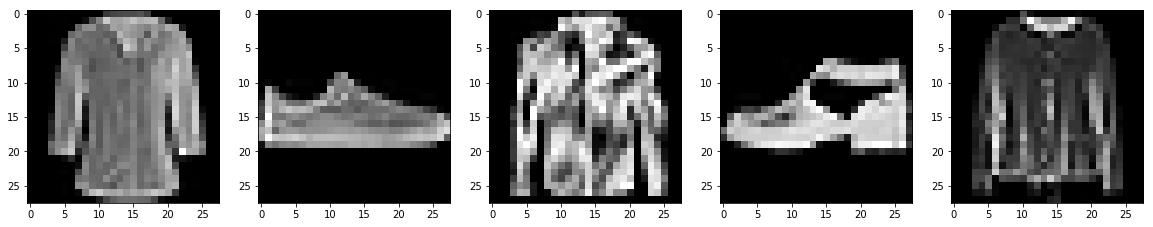

In [5]:
# Data Preparation
x = tf.placeholder(tf.float32, [None, n_input])
y_target = tf.placeholder(tf.float32, [None, n_classes])

# Model Construction
# Store layers weight & bias
weights = {
    'W1': tf.Variable(tf.random_normal(shape=[n_input, n_hidden_1], mean=0.0, stddev=0.01)),
    'W2': tf.Variable(tf.random_normal(shape=[n_hidden_1, n_hidden_2], mean=0.0, stddev=0.01)),
    'out': tf.Variable(tf.random_normal(shape=[n_hidden_2, n_classes], mean=0.0, stddev=0.01))
}

biases = {
    'b1': tf.Variable(tf.random_normal(shape=[n_hidden_1], mean=0.0, stddev=0.01)),
    'b2': tf.Variable(tf.random_normal(shape=[n_hidden_2], mean=0.0, stddev=0.01)),
    'out': tf.Variable(tf.random_normal(shape=[n_classes], mean=0.0, stddev=0.01))
}

# 1st Hidden layer with RELU activation
u2 = tf.matmul(x, weights['W1']) + biases['b1']
z2 = tf.nn.relu(u2)

# 2nd Hidden layer with RELU activation
u3 = tf.matmul(z2, weights['W2']) + biases['b2']
z3 = tf.nn.relu(u3)

# Output layer with linear activation
u_out = tf.matmul(z3, weights['out']) + biases['out']

# Target Setup
error = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=u_out, labels=y_target))
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(error)

# Accuracy   
prediction_and_ground_truth = tf.equal(tf.argmax(u_out, 1), tf.argmax(y_target, 1))
accuracy = tf.reduce_mean(tf.cast(prediction_and_ground_truth, tf.float32))
    
with tf.Session() as sess:
    init = tf.global_variables_initializer()
    sess.run(init)
    
    total_batch = int(math.ceil(data.num_train_data/float(batch_size)))
    print("Total batch: %d" % total_batch)    

    for epoch in range(training_epochs):
        epoch_list.append(epoch)
        # Train Error Value
        train_error_value = sess.run(error, feed_dict={x: data.train_input, y_target: data.train_target})
        train_error_list.append(train_error_value)
        
        validation_error_value = sess.run(error, feed_dict={x: data.validation_input, y_target: data.validation_target})
        validation_error_list.append(validation_error_value)
        
        test_accuracy_value = sess.run(accuracy, feed_dict={x: data.test_input, y_target: data.test_target})
        test_accuracy_list.append(test_accuracy_value) 
        print("Epoch: {0:2d}, Train Error: {1:0.5f}, Validation Error: {2:0.5f}, Test Accuracy: {3:0.5f}".format(epoch, train_error_value, validation_error_value, test_accuracy_value))
        
        for i in range(total_batch):
            i_batch = data.train_input[i * batch_size: i * batch_size + batch_size]
            t_batch = data.train_target[i * batch_size: i * batch_size + batch_size]
            sess.run(optimizer, feed_dict={x: i_batch, y_target: t_batch})
    

    # Draw Graph about Error Values & Accuracy Values
    draw_error_values_and_accuracy()
    
    # False Prediction Profile
    prediction = sess.run(tf.argmax(u_out, 1), feed_dict={x:data.test_input})
    ground_truth = sess.run(tf.argmax(y_target, 1), feed_dict={y_target:data.test_target})

    print(prediction)
    print(ground_truth)

    for i in range(data.num_test_data):
        if (prediction[i] != ground_truth[i]):
            diff_index_list.append(i)
            
    print("Number of False Prediction:", len(diff_index_list))
    draw_false_prediction()